In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('training_set_VU_DM_2014.csv')
data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [31]:
sampled = data.groupby(by='srch_id', as_index=False)
sampled.head()
#data.info()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
28,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
29,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
30,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
31,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
32,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [50]:
selected_names = np.random.choice(data.srch_id.unique(),1000,replace = False)
#grouped = data[data.srch_id.isin(selected_names)].groupby('srch_id')
grouped = data[data.srch_id.isin(selected_names)]
grouped.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
3060,195,2012-12-24 07:32:56,5,219,NaN,NaN,219,8660,3,3.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,7.0,0,NaN,0
3061,195,2012-12-24 07:32:56,5,219,NaN,NaN,219,21997,3,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3062,195,2012-12-24 07:32:56,5,219,NaN,NaN,219,22900,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3063,195,2012-12-24 07:32:56,5,219,NaN,NaN,219,28285,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3064,195,2012-12-24 07:32:56,5,219,NaN,NaN,219,31144,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [51]:
#grouped.apply(pd.DataFrame.info)
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24577 entries, 3060 to 4957487
Data columns (total 54 columns):
srch_id                        24577 non-null int64
date_time                      24577 non-null object
site_id                        24577 non-null int64
visitor_location_country_id    24577 non-null int64
visitor_hist_starrating        1052 non-null float64
visitor_hist_adr_usd           1084 non-null float64
prop_country_id                24577 non-null int64
prop_id                        24577 non-null int64
prop_starrating                24577 non-null int64
prop_review_score              24531 non-null float64
prop_brand_bool                24577 non-null int64
prop_location_score1           24577 non-null float64
prop_location_score2           19198 non-null float64
prop_log_historical_price      24577 non-null float64
position                       24577 non-null int64
price_usd                      24577 non-null float64
promotion_flag                 24577 non-

In [52]:
grouped.to_csv('1000users')

In [5]:
data.describe()

,Unnamed: 0,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,1.000000e+04,10000.00000,10000.000000,10000.00000,529.000000,530.000000,10000.000000,10000.000000,10000.000000,9980.000000,...,182.000000,557.000000,637.000000,261.000000,3962.000000,4114.000000,1310.000000,10000.000000,292.000000,10000.000000
mean,2.477201e+06,166235.31720,9.982500,176.15100,3.367524,178.652057,175.840300,69440.560500,3.165400,3.768587,...,16.274725,0.120287,0.097331,17.122605,-0.058809,0.011667,16.868702,0.046900,387.898836,0.029200
std,1.434754e+06,96338.39767,7.722432,65.41621,0.684361,99.552453,67.340583,40589.110768,1.059979,1.069337,...,17.455273,0.624645,0.345605,19.931814,0.476485,0.207705,104.752673,0.211435,448.457204,0.168375
min,1.100000e+02,11.00000,1.000000,2.00000,1.700000,8.460000,2.000000,1.000000,0.000000,0.000000,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,5.960000,0.000000
25%,1.246970e+06,83445.50000,5.000000,100.00000,2.880000,109.825000,103.000000,34582.500000,3.000000,3.500000,...,7.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,123.800000,0.000000
50%,2.488700e+06,167144.50000,5.000000,219.00000,3.390000,156.315000,219.000000,68491.000000,3.000000,4.000000,...,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000,0.000000,235.180000,0.000000
75%,3.730290e+06,250523.25000,14.000000,219.00000,3.940000,224.870000,219.000000,104315.750000,4.000000,4.500000,...,17.000000,1.000000,0.000000,19.000000,0.000000,0.000000,17.000000,0.000000,437.470000,0.000000
max,4.958243e+06,332777.00000,34.000000,231.00000,5.000000,662.510000,230.000000,140795.000000,5.000000,5.000000,...,145.000000,1.000000,1.000000,190.000000,1.000000,1.000000,3766.000000,1.000000,2722.520000,1.000000


In [6]:
#sample = data.sample(n=10000)

In [7]:
#sample.head()

In [8]:
#sample.describe()

In [9]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

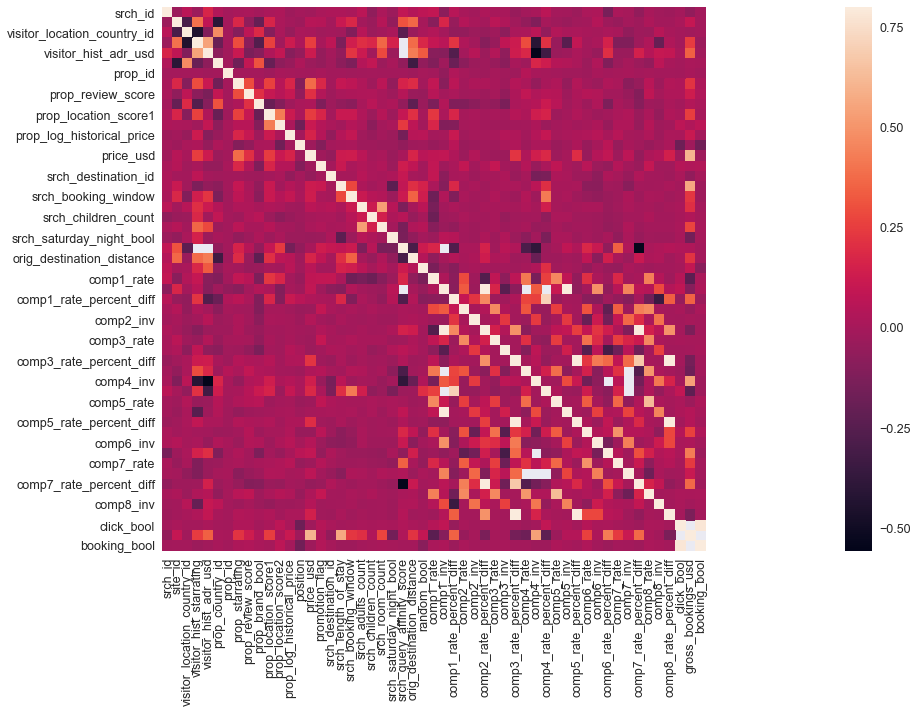

In [59]:
#add prog and money
corrmat = grouped.corr()
f, ax = plt.subplots(figsize=(50, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

In [19]:
#sample.to_csv('sampled')

In [15]:
searches = data.srch_id.value_counts()
len(searches)

9718

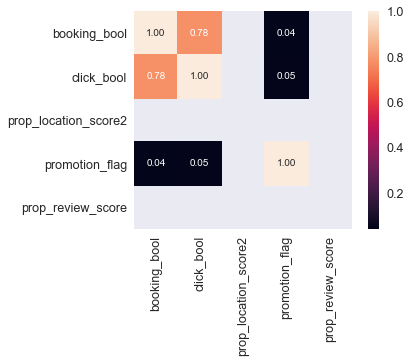

In [61]:
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'booking_bool')['booking_bool'].index
cm = np.corrcoef(grouped[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

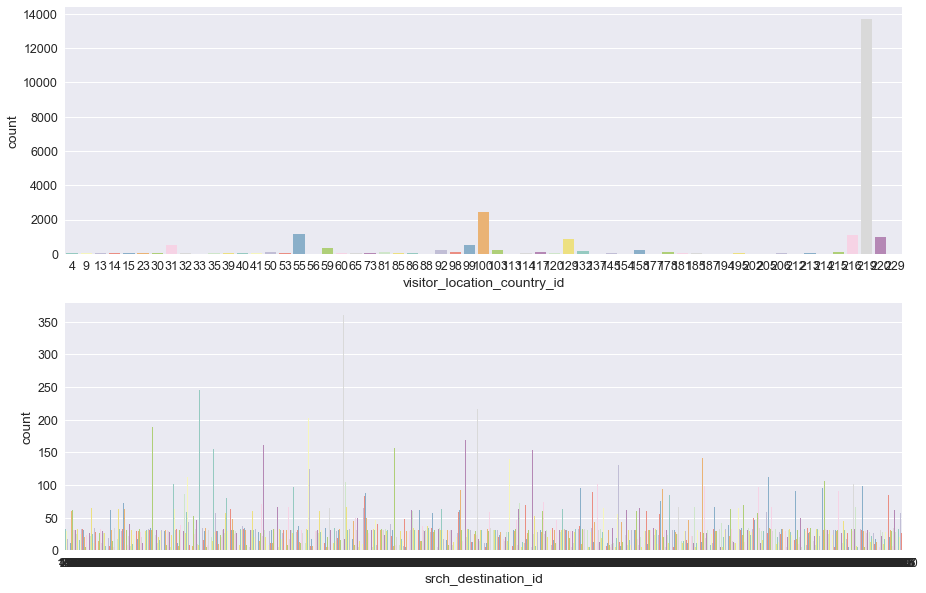

In [62]:
# Plot 

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))

bookings_df = grouped[grouped["booking_bool"] == 1]

# What are the most countries the customer travel from?
sns.countplot('visitor_location_country_id',data=grouped.sort_values(by=['visitor_location_country_id']),ax=axis1,palette="Set3")

# What are the most countries the customer travel to?
sns.countplot('srch_destination_id',data=grouped.sort_values(by=['srch_destination_id']),ax=axis2,palette="Set3")

# Combine both plots
# fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

# sns.distplot(bookings_df["hotel_country"], kde=False, rug=False, bins=25, ax=axis1)
# sns.distplot(bookings_df["user_location_country"], kde=False, rug=False, bins=25, ax=axis1)

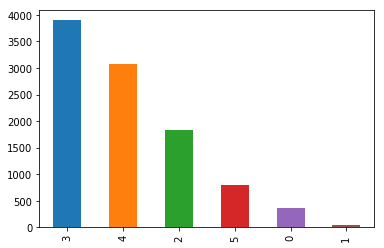

In [10]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
sample.prop_starrating.value_counts().plot.bar();